# importing labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing & inspecting data

In [2]:
titanic=pd.read_csv("data/train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic['Name'].nunique()

891

In [9]:
titanic['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [10]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic['Cabin'].isna()


0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [12]:
titanic['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

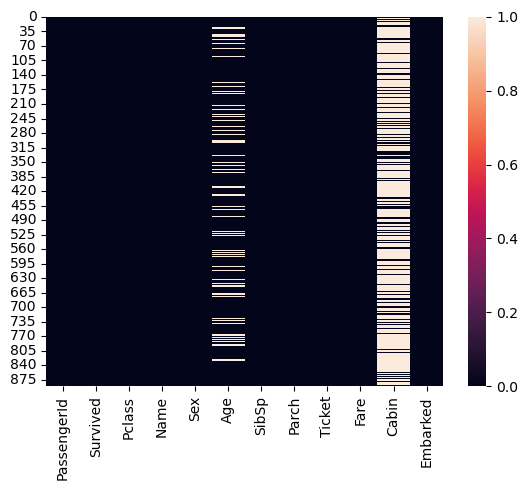

In [13]:
sns.heatmap(titanic.isna())

In [14]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# data cleaning 

# dealing with missing data

In [15]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic['Age']=titanic['Age'].fillna(titanic["Age"].mean())

<AxesSubplot:>

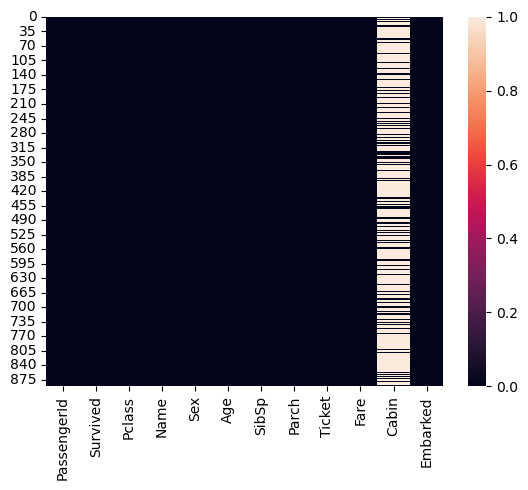

In [17]:
sns.heatmap(titanic.isna())

In [18]:
titanic.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

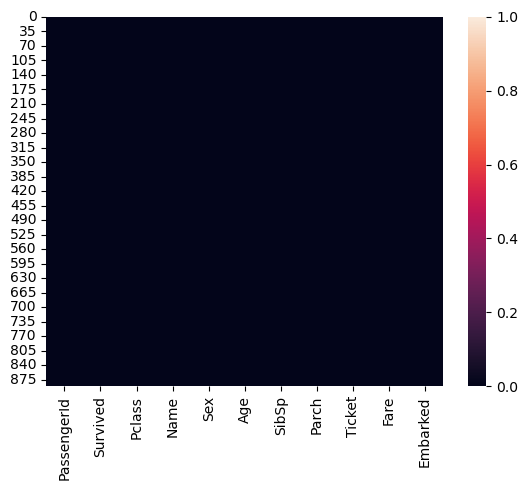

In [19]:
sns.heatmap(titanic.isna())

# categorical features

In [20]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
emb=pd.get_dummies(titanic['Embarked'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [21]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic=pd.concat([titanic,sex,emb],axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0


In [23]:
#Drop all unnecessary columns.
titanic.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [24]:
titanic.rename(columns={'male':'gender'},inplace=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


# Data Visualation

# survival

In [25]:
#1-What is the overall survival rate of passengers on the Titanic?
survival_percentage=titanic['Survived'].mean()*100
print("The survival rate: {:.2f}%".format(survival_percentage))

The survival rate: 38.38%


<AxesSubplot:xlabel='Survived', ylabel='count'>

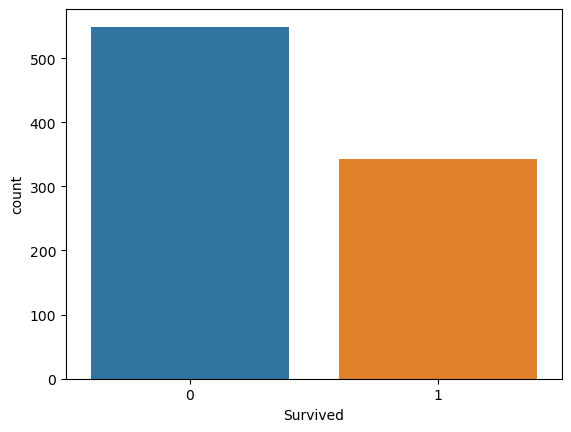

In [26]:
sns.countplot(x='Survived',data=titanic)

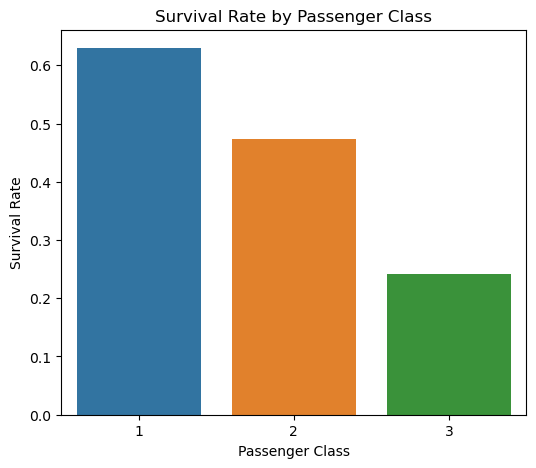

In [27]:
#2-How does the survival rate vary by passenger class (Pclass)?
t = titanic.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=t.index, y=t.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

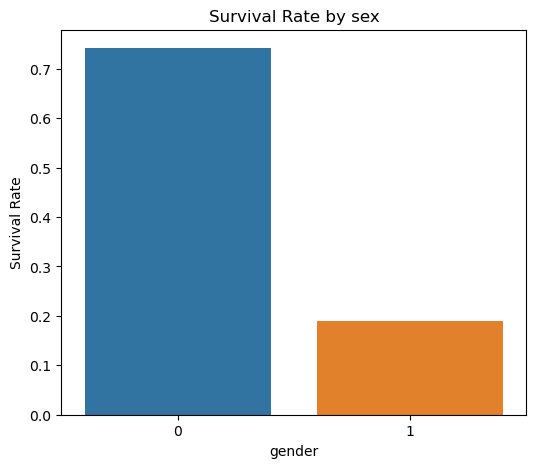

In [28]:
#3-Is there a correlation between passenger gender (Sex) and survival?
t=titanic.groupby('gender').Survived.mean()
plt.figure(figsize=(6, 5))
sns.barplot(x=t.index, y=t.values)
plt.xlabel('gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by sex')
plt.show()

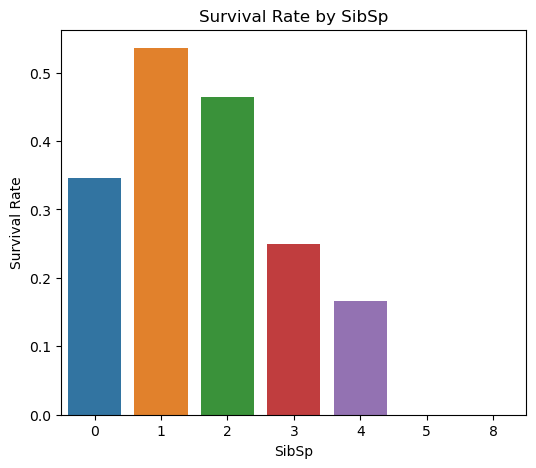

In [29]:
#5-Did passengers with siblings/spouses (SibSp) or parents/children (Parch) aboard have a higher survival rate?
titanic.head(5)
t=titanic.groupby('SibSp').Survived.mean()
plt.figure(figsize=(6, 5))
sns.barplot(x=t.index, y=t.values)
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by SibSp')
plt.show()

In [30]:
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


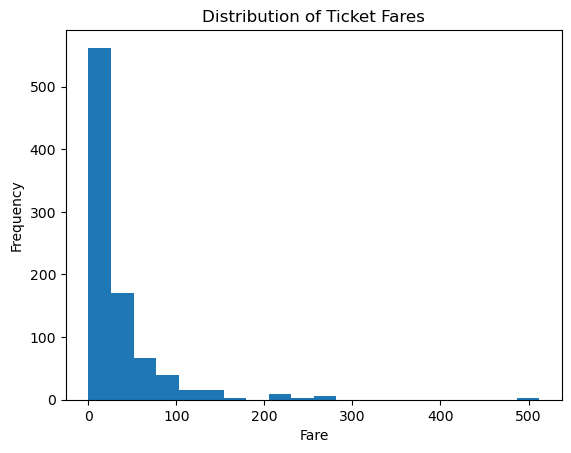

In [31]:
#6-What was the distribution of ticket fares (Fare) and how did it relate to survival?
plt.hist(titanic['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Fares')
plt.show()

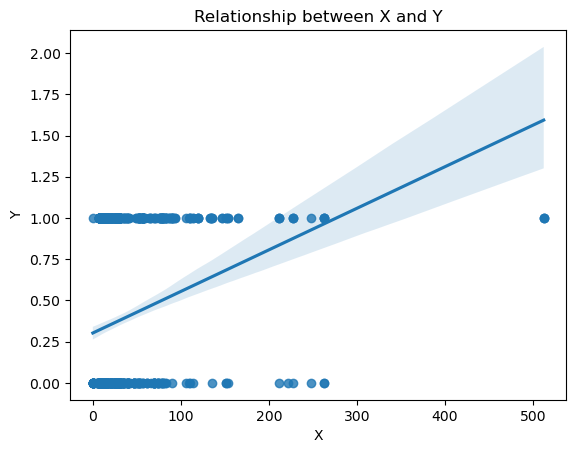

In [32]:
sns.regplot(x=titanic['Fare'], y=titanic['Survived'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship between X and Y')
plt.show()

In [33]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


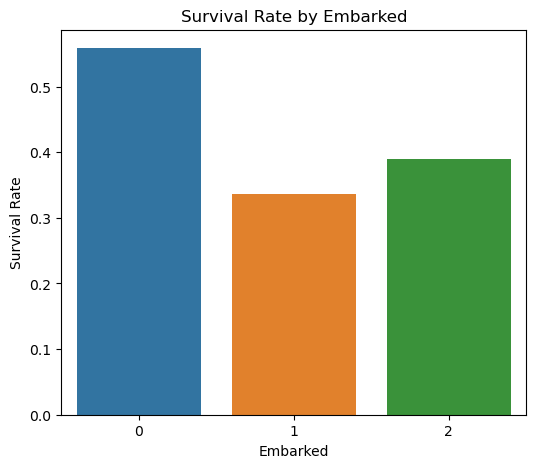

In [34]:
#7-Did the embarkation point (Embarked) have any impact on the survival rate

t = titanic.groupby(['Q', 'S']).Survived.mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(x=t.index, y=t.Survived)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked')
plt.show()


<AxesSubplot:>

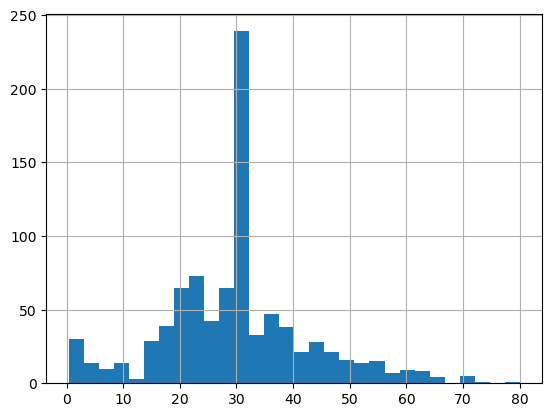

In [35]:
#8-Did the age have any impact on the survival rate?
titanic['Age'].hist(bins=30)

# builiding model

# train/test split data

In [36]:
y=titanic['Survived']
X=titanic.drop('Survived',axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
titanic.shape

(891, 9)


# model training and predicting

In [38]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=5000)

In [39]:
#training
clf.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [40]:
y_pred=clf.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [41]:
y_test.values[:10]

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

# evaluate model


In [42]:
clf.score(X_train,y_train)

0.8089887640449438

In [43]:
clf.score(X_test,y_test)

0.776536312849162

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       106
           1       0.73      0.73      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [45]:
from sklearn.svm import SVC

In [46]:
confusion_matrix(y_test,y_pred)

array([[86, 20],
       [20, 53]], dtype=int64)

In [47]:
accuracy_score(y_test,y_pred)

0.776536312849162

In [48]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.22346368715083798
